In [1]:
import pandas as pd 

In [2]:
df = pd.read_excel("data/out/arv.xlsx")



In [3]:
df1 = pd.read_excel("../Hep/data/out/Med_Hep_dci_atc_split.xlsx")

In [5]:
df=df.drop("DCI",axis=1)
df=df.drop("ATC",axis=1)
df=df.drop("n_meds",axis=1)

In [7]:
df.to_excel("result_final.xlsx",index=False)

In [10]:
df1=df1.drop("DCI",axis=1)
df1=df1.drop("ATC",axis=1)
df1=df1.drop("n_meds",axis=1)

In [11]:
df1.to_excel("../Hep/result_final.xlsx",index=False)

In [12]:
df

,ARV,Med_1,DCI_Med1,ATC_Med1,Med_2,DCI_Med2,ATC_Med2,Med_3,DCI_Med3,ATC_Med3,...,ATC_Med8,Med_9,DCI_Med9,ATC_Med9,Med_10,DCI_Med10,ATC_Med10,Med_11,DCI_Med11,ATC_Med11
0,Combivir + Kalétra,COMBIVIR,LAMIVUDINE; ZIDOVUDINE,J05AR01,KALETRA,LOPINAVIR; RITONAVIR,J05AR10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Isentress + Truvada,ISENTRESS,RALTEGRAVIR,J05AJ01,TRUVADA,EMTRICITABINE; TENOFOVIR DISOPROXIL,J05AR03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Isentress + Kivexa,ISENTRESS,RALTEGRAVIR,J05AJ01,KIVEXA,ABACAVIR ; LAMIVUDINE,J05AR02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Triumeq,TRIUMEQ,DOLUTEGRAVIR ; LAMIVUDINE; ABACAVIR,J05AR13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Genvoya,GENVOYA,COBICISTAT; ELVITEGRAVIR; EMTRICITABINE; TENOF...,J05AR18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,Fuzeon + Trizivir + Viread + TMC 114,FUZEON,ENFUVIRTIDE,J05AX07,TRIZIVIR,LAMIVUDINE; ABACAVIR; ZIDOVUDINE,NAN,VIREAD,TENOFOVIR DISOPROXIL,J05AF07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19216,Norvir + Truvada + Ziagen + TMC 114 (Darunavir...,NORVIR,RITONAVIR,J05AE03,TRUVADA,EMTRICITABINE; TENOFOVIR DISOPROXIL,J05AR03,ZIAGEN,ABACAVIR,J05AF06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19217,Norvir + Prezista + Truvada + Ziagen + TMC 125...,NORVIR,RITONAVIR,J05AE03,PREZISTA,DARUNAVIR,NAN,TRUVADA,EMTRICITABINE; TENOFOVIR DISOPROXIL,J05AR03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19218,Norvir + Prezista + Truvada + Ziagen + Maravir...,NORVIR,RITONAVIR,J05AE03,PREZISTA,DARUNAVIR,NAN,TRUVADA,EMTRICITABINE; TENOFOVIR DISOPROXIL,J05AR03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ARV

### Nombre de médicaments par traitement

In [14]:
med_cols = [col for col in df.columns if col.startswith("Med_")]

df["nb_medicaments"] = df[med_cols].notna().sum(axis=1)

df["nb_medicaments"].describe()


count    19220.000000
mean         3.962331
std          1.195947
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         11.000000
Name: nb_medicaments, dtype: float64

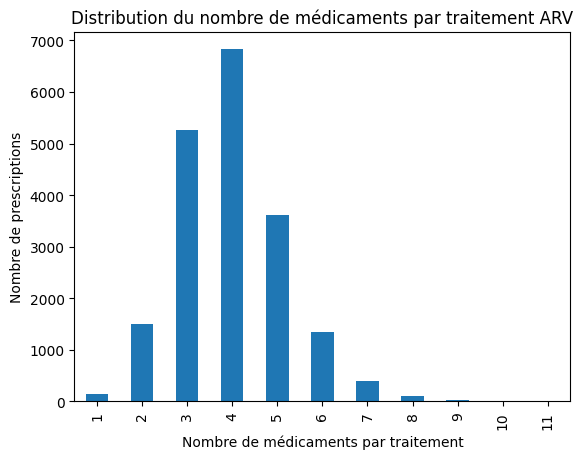

In [19]:
df["nb_medicaments"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Nombre de médicaments par traitement")
plt.ylabel("Nombre de prescriptions")
plt.title("Distribution du nombre de médicaments par traitement ARV")
plt.show()


In [20]:
def categorie_traitement(n):
    if n == 1:
        return "Monothérapie"
    elif n == 2:
        return "Bithérapie"
    elif n == 3:
        return "Trithérapie"
    else:
        return "≥ 4 médicaments"

df["type_traitement"] = df["nb_medicaments"].apply(categorie_traitement)

df["type_traitement"].value_counts()


type_traitement
≥ 4 médicaments    12295
Trithérapie         5268
Bithérapie          1503
Monothérapie         154
Name: count, dtype: int64

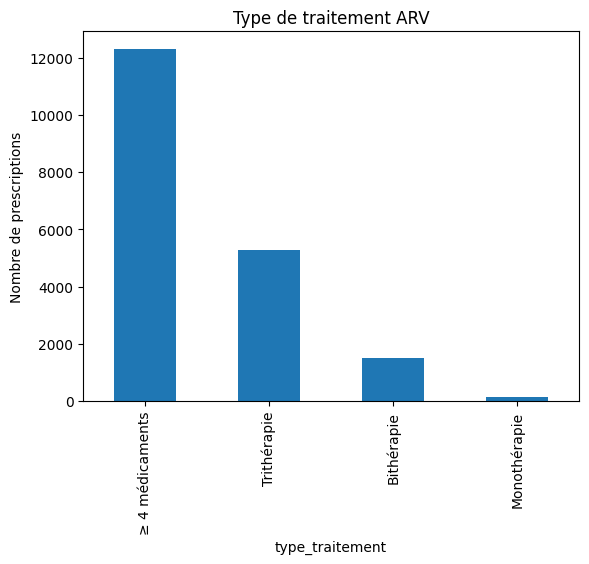

In [21]:
df["type_traitement"].value_counts().plot(kind="bar")
plt.ylabel("Nombre de prescriptions")
plt.title("Type de traitement ARV")
plt.show()


### Fréquence des médicaments (spécialités)

In [23]:
med_freq = (
    df[med_cols]
    .melt(value_name="medicament")
    .dropna()
)

med_freq["medicament"].value_counts().head(20)


medicament
NORVIR                 8022
VIDEX                  4718
EPIVIR                 4606
VIREAD                 3938
ZIAGEN                 3680
KALETRA                3439
ZERIT                  2744
SUSTIVA                2326
INVIRASE               2235
RETROVIR               2067
FUZEON                 2016
REYATAZ                1968
VIRAMUNE               1775
CRIXIVAN               1694
AGENERASE              1562
PREZISTA               1475
ISENTRESS              1455
TELZIR                 1397
VIRACEPT               1395
LAMIVUDINE (EPIVIR)    1267
Name: count, dtype: int64

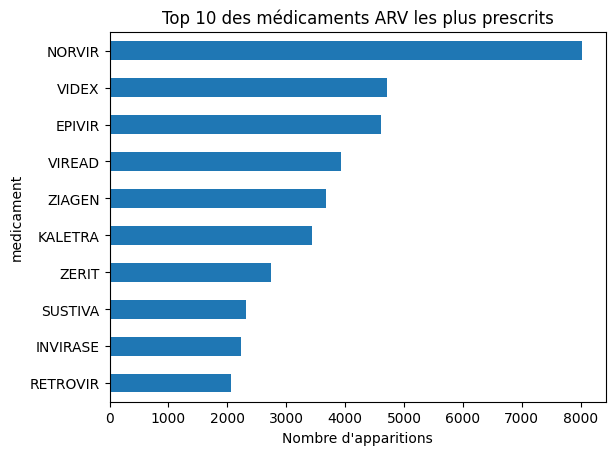

In [24]:
med_freq["medicament"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Nombre d'apparitions")
plt.title("Top 10 des médicaments ARV les plus prescrits")
plt.gca().invert_yaxis()
plt.show()


In [25]:
dci_cols = [col for col in df.columns if col.startswith("DCI_")]

dci_freq = (
    df[dci_cols]
    .melt(value_name="DCI")
    .dropna()
)

dci_freq["DCI"].value_counts().head(20)


DCI
RITONAVIR                              8782
LAMIVUDINE                             5888
DIDANOSINE                             4817
TENOFOVIR DISOPROXIL                   4416
ABACAVIR                               4097
LOPINAVIR; RITONAVIR                   3531
EFAVIRENZ                              2885
STAVUDINE                              2810
DARUNAVIR                              2635
ENFUVIRTIDE                            2605
SAQUINAVIR                             2516
NEVIRAPINE                             2295
ZIDOVUDINE                             2143
ATAZANAVIR                             2129
RALTEGRAVIR                            1909
INDINAVIR                              1731
EMTRICITABINE; TENOFOVIR DISOPROXIL    1670
LAMIVUDINE; ZIDOVUDINE                 1603
AMPRENAVIR                             1568
FOSAMPRENAVIR                          1455
Name: count, dtype: int64

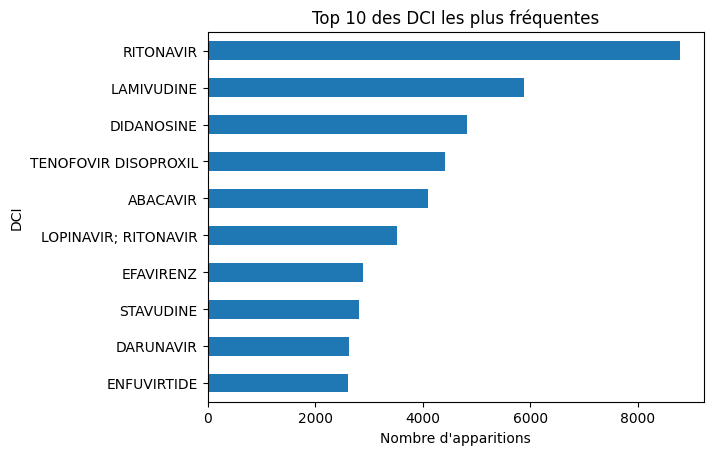

In [26]:
dci_freq["DCI"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Nombre d'apparitions")
plt.title("Top 10 des DCI les plus fréquentes")
plt.gca().invert_yaxis()
plt.show()


### Analyse des classes thérapeutiques (ATC)

In [27]:
atc_cols = [col for col in df.columns if col.startswith("ATC_")]

atc_freq = (
    df[atc_cols]
    .melt(value_name="ATC")
    .dropna()
)

atc_freq["ATC"].value_counts().head(20)


ATC
J05AE03    8782
J05AF05    5888
NAN        4942
J05AF02    4817
J05AF07    4416
J05AF06    4097
J05AR10    3542
J05AG03    2885
J05AF04    2810
J05AX07    2605
J05AE01    2516
J05AG01    2295
J05AF01    2143
J05AE08    2129
J05AJ01    1909
J05AE02    1731
J05AR03    1670
J05AR01    1603
J05AE05    1568
J05AE07    1455
Name: count, dtype: int64

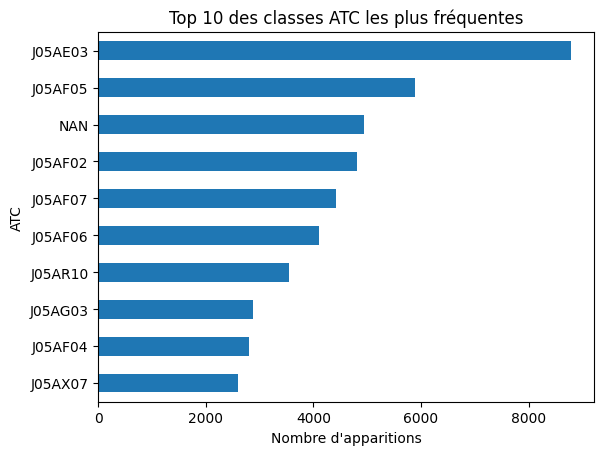

In [28]:
atc_freq["ATC"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Nombre d'apparitions")
plt.title("Top 10 des classes ATC les plus fréquentes")
plt.gca().invert_yaxis()
plt.show()


### Nombre de classes ATC par traitement (complexité)

In [29]:
df["nb_classes_ATC"] = df[atc_cols].nunique(axis=1)

df["nb_classes_ATC"].describe()


count    19220.000000
mean         3.893965
std          1.167841
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         11.000000
Name: nb_classes_ATC, dtype: float64

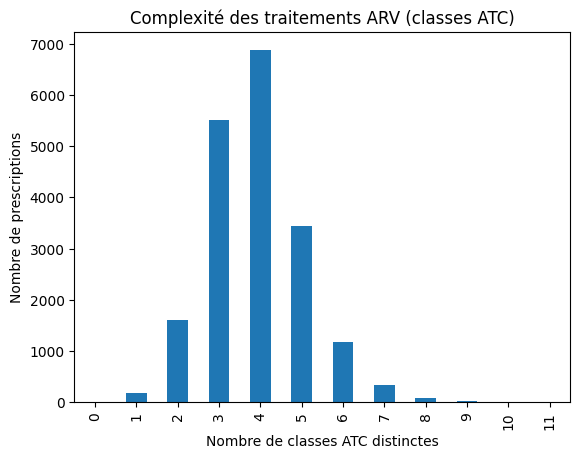

In [30]:
df["nb_classes_ATC"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Nombre de classes ATC distinctes")
plt.ylabel("Nombre de prescriptions")
plt.title("Complexité des traitements ARV (classes ATC)")
plt.show()


### Médicaments combinés (1 Med vs plusieurs Med)

In [31]:
df["type_forme"] = np.where(df["nb_medicaments"] == 1,
                            "Médicament combiné",
                            "Association de médicaments")

df["type_forme"].value_counts()


type_forme
Association de médicaments    19066
Médicament combiné              154
Name: count, dtype: int64

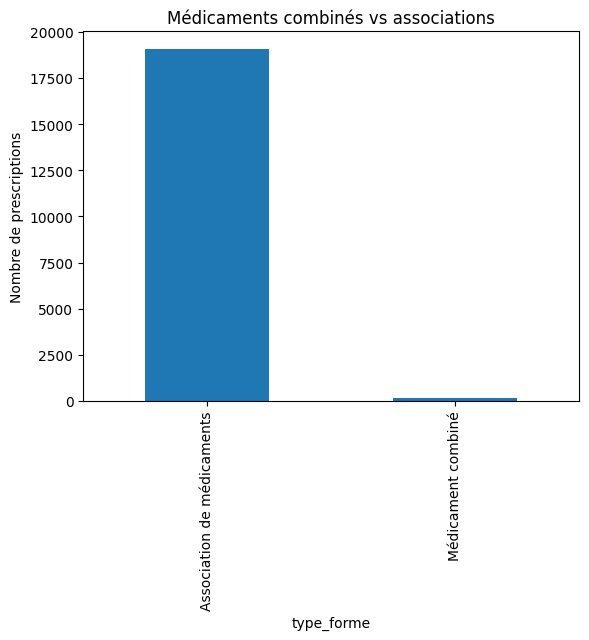

In [32]:
df["type_forme"].value_counts().plot(kind="bar")
plt.title("Médicaments combinés vs associations")
plt.ylabel("Nombre de prescriptions")
plt.show()


### Données manquantes (qualité des données)

In [33]:
missing = df.isna().mean().sort_values(ascending=False) * 100
missing.head(15)


ATC_Med11    99.984391
DCI_Med11    99.984391
Med_11       99.984391
ATC_Med10    99.968783
DCI_Med10    99.968783
Med_10       99.968783
ATC_Med9     99.869927
DCI_Med9     99.869927
Med_9        99.869927
ATC_Med8     99.365245
DCI_Med8     99.365245
Med_8        99.365245
DCI_Med7     97.294485
ATC_Med7     97.294485
Med_7        97.294485
dtype: float64

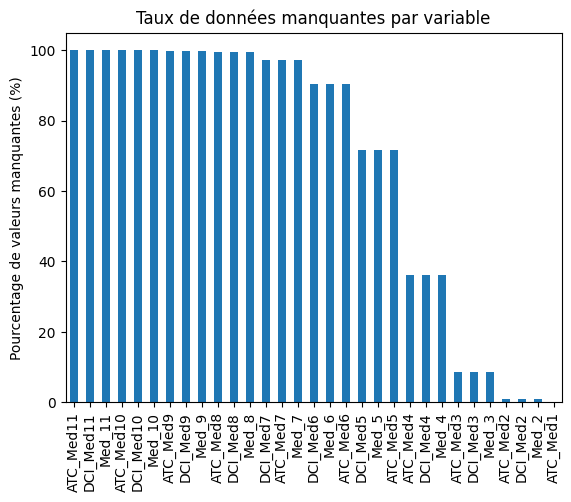

In [34]:
missing[missing > 0].plot(kind="bar")
plt.ylabel("Pourcentage de valeurs manquantes (%)")
plt.title("Taux de données manquantes par variable")
plt.show()


### tb

In [35]:
resume = pd.DataFrame({
    "Nombre total de prescriptions": [len(df)],
    "Médicaments moyens par traitement": [df["nb_medicaments"].mean()],
    "Classes ATC moyennes par traitement": [df["nb_classes_ATC"].mean()]
})

resume


,Nombre total de prescriptions,Médicaments moyens par traitement,Classes ATC moyennes par traitement
0,19220,3.962331,3.893965
